In [4]:
# Importation des modules généraux
import numpy as np
import pandas as pd
from tqdm import tqdm

# Pour les graphiques
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import seaborn as sns

# Pour manipuler les types de chaînes temporelles
import datetime

# Pour l'analyse exploratoire des données (EDA)
#from pandas_profiling import ProfileReport

# Pour la construction du modèle d'apprentissage automatique
from sklearn.model_selection import train_test_split

# Différents régresseurs pour le modèle d'apprentissage automatique
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Pour l'évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Pour l'optimisation de la recherche sur la grille des paramètres
from sklearn.model_selection import GridSearchCV

# Pour sauvegarder le modèle
import pickle

# Pour le tracé q-q
import scipy.stats as stats

Importent la data

In [5]:
qa = pd.read_csv("/content/AirQualityUCI.csv", sep = ";", decimal = ",")

In [6]:
qa.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Supprimons les colonnes 15 et 16 car ils contiennent des fausses données *unnamed*

In [7]:
qa.drop(['Unnamed: 15','Unnamed: 16'], axis=1, inplace=True, errors = 'ignore')

Remplaçons-200 qui représente un code pour des mesures fausses par nan

In [8]:
qa.replace(to_replace = -200, value = np.nan, inplace = True)

In [9]:
qa.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


La colonne 4 contient trop de valeurs -200 que on a remplace par nan, on vas supprimer cette colonne

In [10]:
qa.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')
qa=qa.dropna()

In [11]:
qa.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Temp

In [12]:

#Création d'un objet format temp
qa['DateTime'] = (qa.Date) + ' ' + (qa.Time)
qa.DateTime = qa.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))

In [13]:
#intégrons le nouveau fomrat de date en remplaçant l'ancien

qa['Weekday'] = qa['DateTime'].dt.day_name()
qa['Month'] = qa['DateTime'].dt.month_name()
qa['Hour'] = qa['DateTime'].dt.hour
qa['Date'] = pd.to_datetime(qa['Date'], format='%d/%m/%Y')
qa.drop('Time', axis=1, inplace=True, errors = 'ignore')

In [14]:
qa.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Weekday,Month,Hour
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,Wednesday,March,18
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,Wednesday,March,19
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,Wednesday,March,20
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,Wednesday,March,21
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,Wednesday,March,22


In [15]:
#Etude de la dataset
qa.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573,12.020170
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097,6.813924
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100,7.000000
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900,12.000000
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600,18.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600,23.000000


orginazons selon jours heurs mois pour les futures etudes

In [16]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June',
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in months:
    temp_df = qa.loc[(qa['Month'] == month)]
    month_df_list.append(temp_df)

for day in days:
    temp_df = qa.loc[(qa['Weekday'] == day)]
    day_df_list.append(temp_df)

for hour in range(24):
    temp_df = qa.loc[(qa['Hour'] == hour)]
    hour_df_list.append(temp_df)

une fonction pour la vizualisation

In [17]:
def df_time_plotter(df_list, time_unit, y_col):

    months = ['January','February','March', 'April', 'May','June',
              'July', 'August', 'September', 'October', 'November', 'December']

    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    if time_unit == 'M':
        nRows = 3
        nCols = 4
        n_iter = len(months)
    elif time_unit == 'D':
        nRows = 2
        nCols = 4
        n_iter = len(days)
    elif time_unit == 'H':
        nRows = 4
        nCols = 6
        n_iter = 24
    else:
        print('time_unit doit etre un string M,D, or H')
        return 0

    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (40,30))
    axs = axs.ravel()
    for i in range(n_iter):
        data = df_list[i]
        ax = axs[i]
        data.plot(kind ='scatter', x = 'DateTime', y= y_col , ax = ax, fontsize = 24)
        ax.set_ylabel('Pollutant Concentration',fontsize=30)
        ax.set_xlabel('')
        if time_unit == 'M':
            ax.set_title(y_col + ' ' + months[i],  size=40) # Title
        elif time_unit == 'D':
            ax.set_title(y_col + ' ' + days[i],  size=40) # Title
        else:
             ax.set_title(y_col + ' ' + str(i),  size=40) # Title
        ax.tick_params(labelrotation=60)


    # espacement entres les subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)
    plt.show()

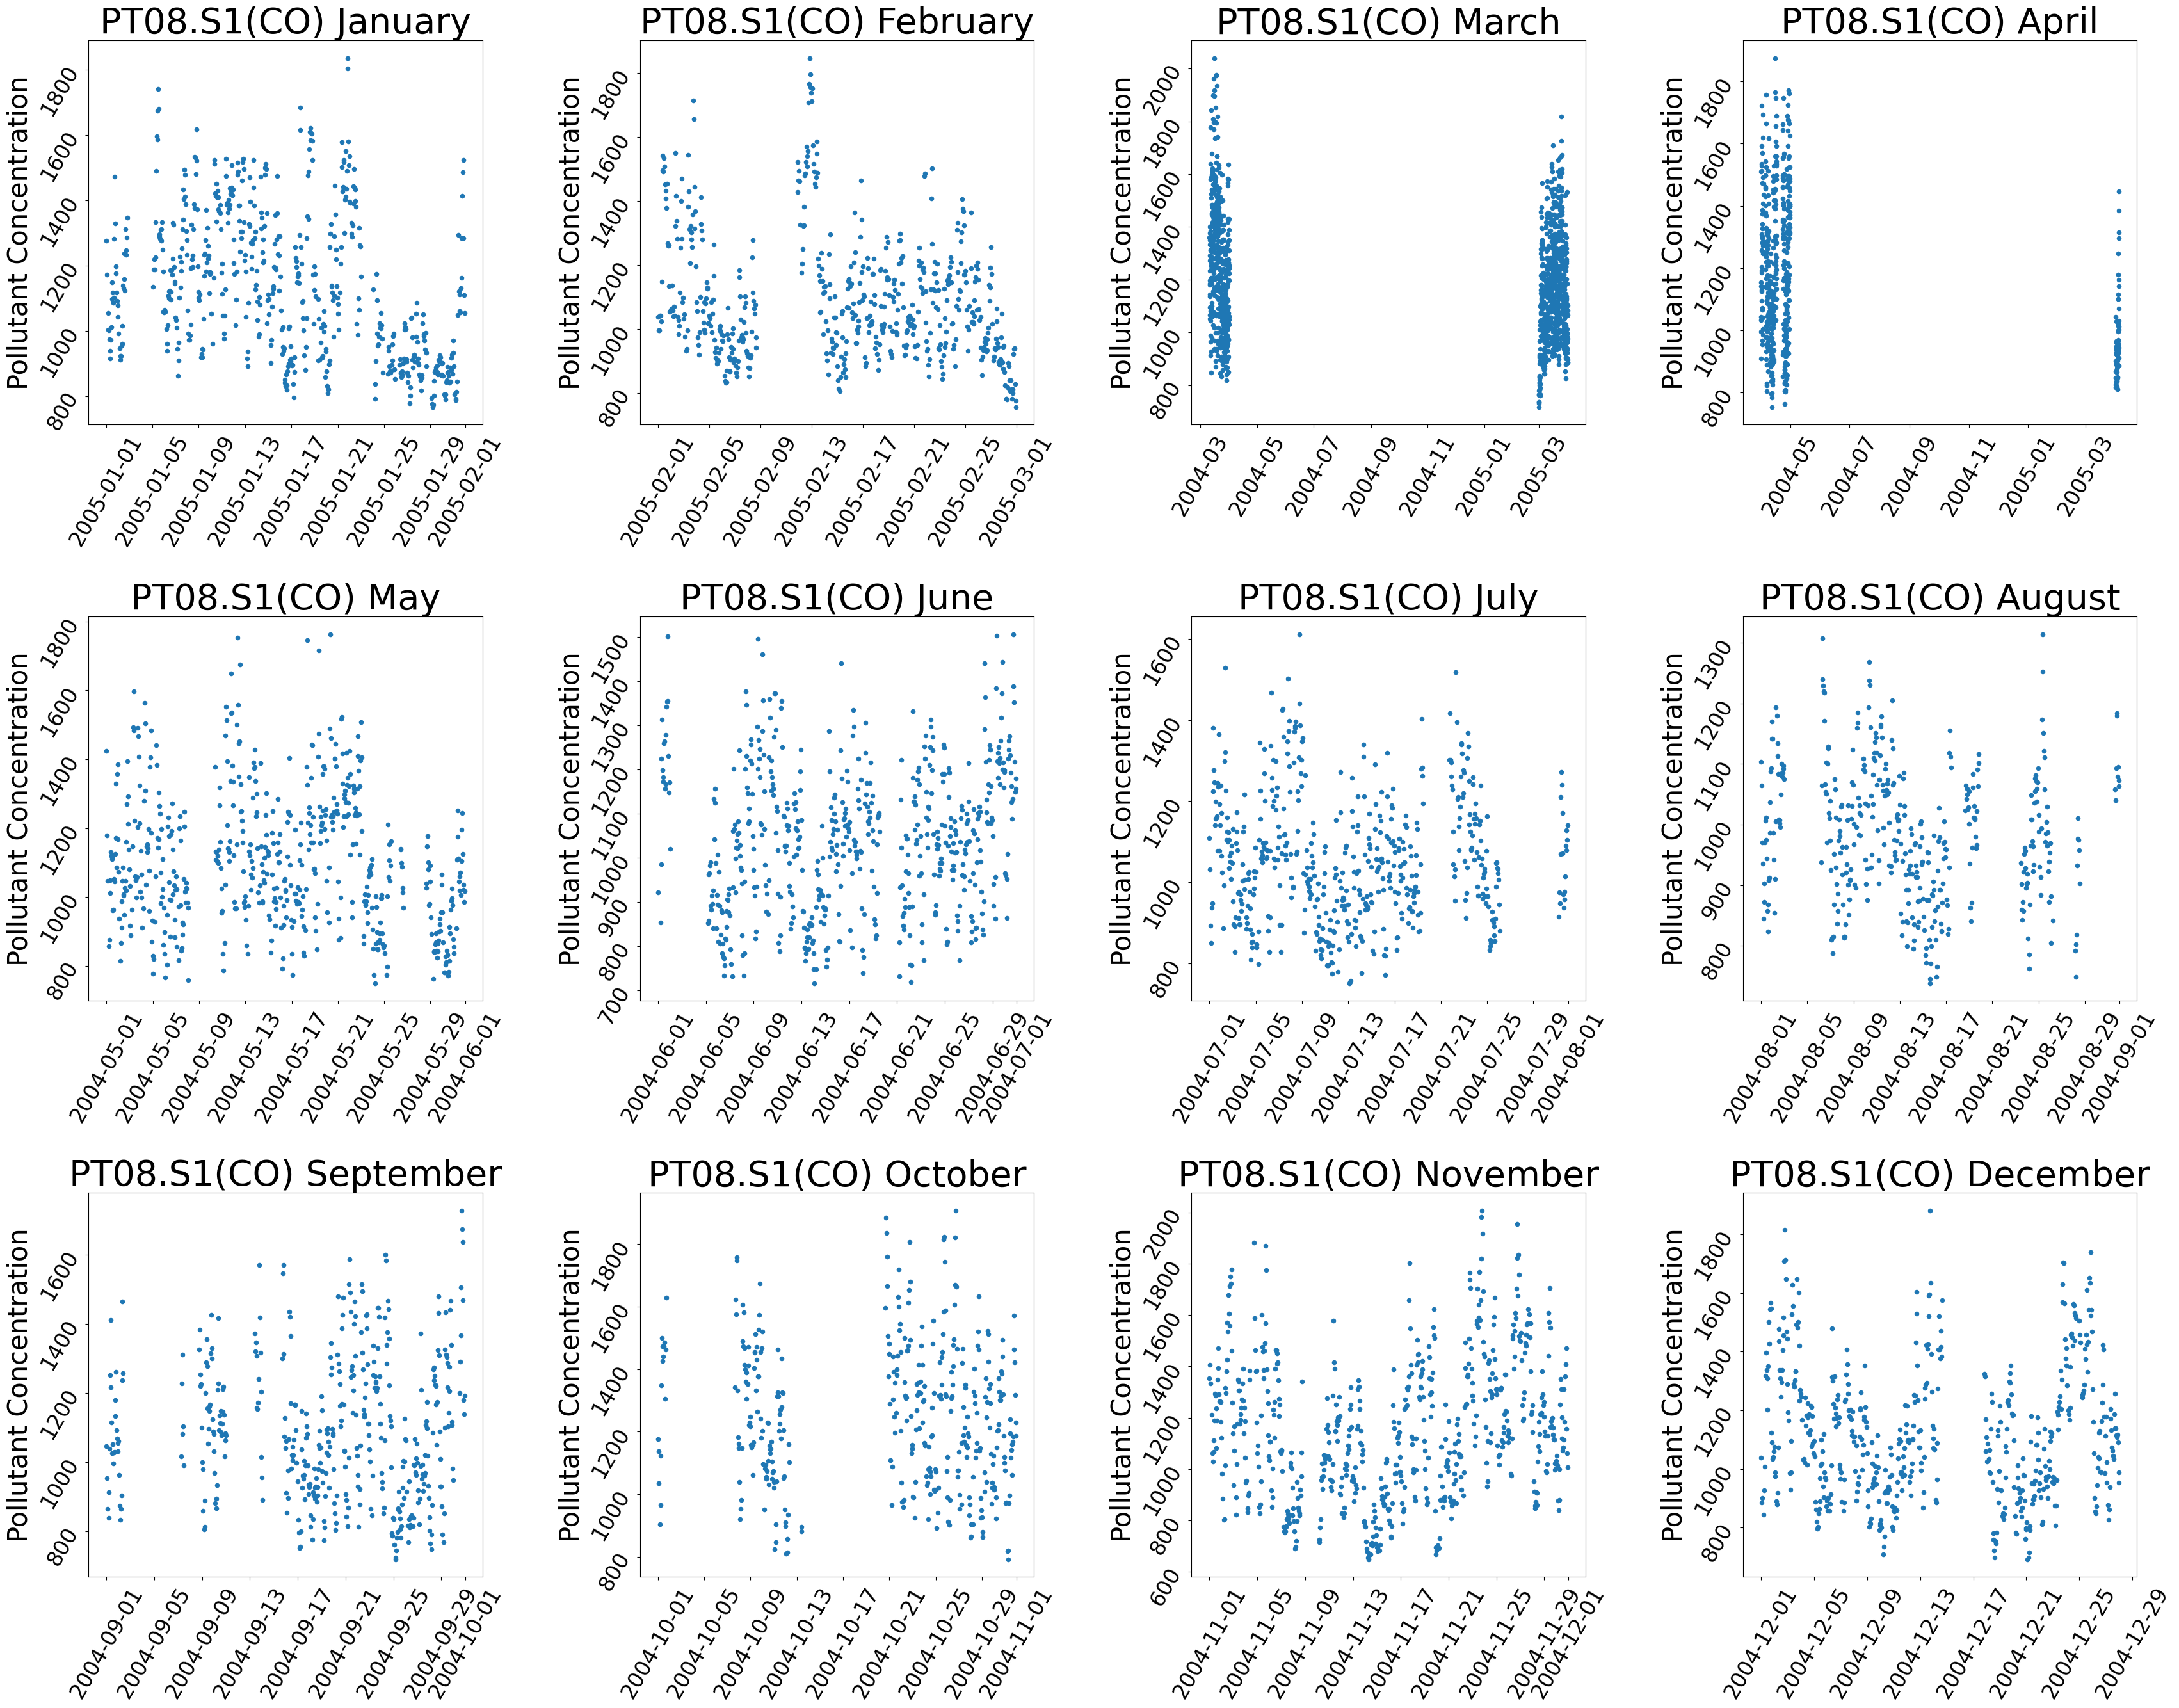

In [18]:
df_time_plotter(month_df_list,'M','PT08.S1(CO)')

un formatage basant sur la date

In [19]:
qa = qa[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
qa.head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


quelques modifications

# **Entraînement des modèles**

**Etude du polluant CO**

Résultats pour Régression linéaire:
Mean Squared Error (Erreur quadratique moyenne): 0.15822178057249958
R-squared (R²): 0.9162005100037096



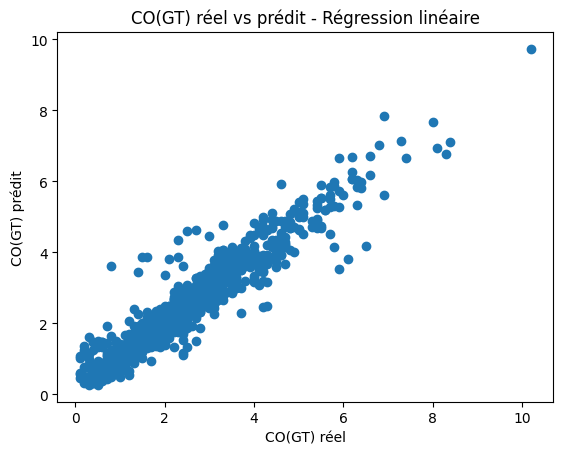

Résultats pour Régression de Huber:
Mean Squared Error (Erreur quadratique moyenne): 0.16098399722900358
R-squared (R²): 0.9147375486703411



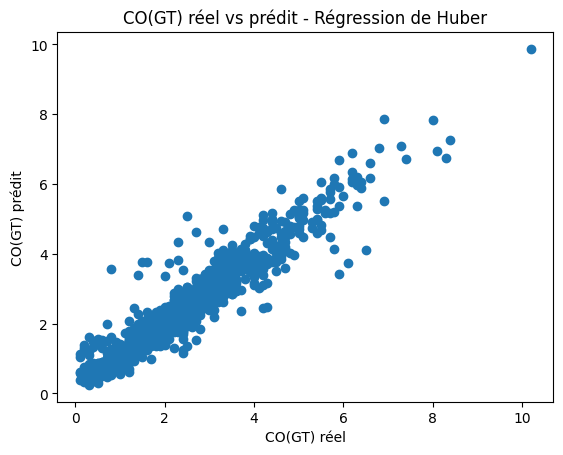

Résultats pour Forêt aléatoire:
Mean Squared Error (Erreur quadratique moyenne): 0.26201167697865324
R-squared (R²): 0.8612299468225036



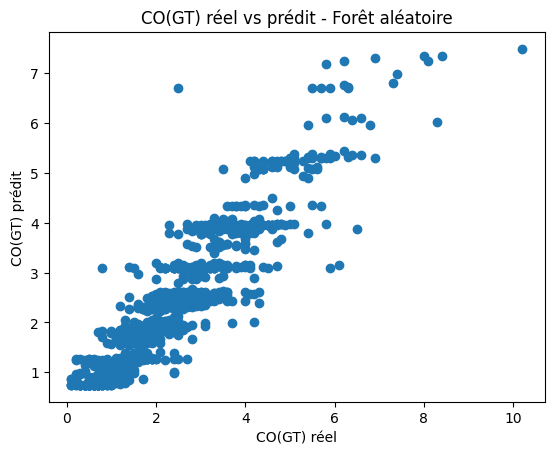

Résultats pour Gradient Boosting:
Mean Squared Error (Erreur quadratique moyenne): 0.1497993321767704
R-squared (R²): 0.9206613173434347



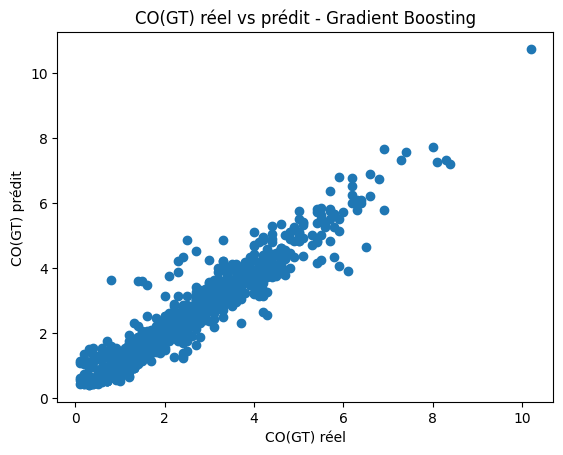

Résultats pour K-Neighbors:
Mean Squared Error (Erreur quadratique moyenne): 0.16534542836573074
R-squared (R²): 0.9124275904358349



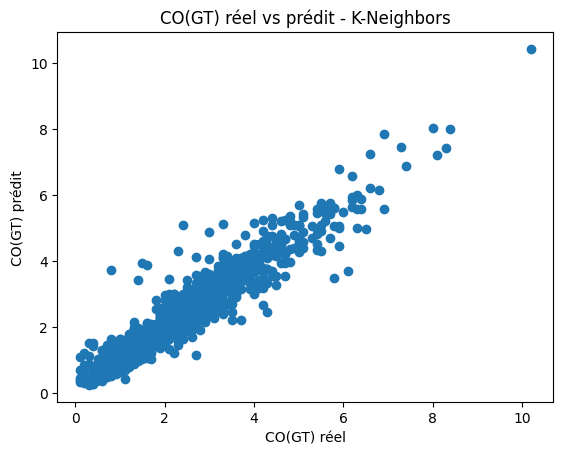

Résultats pour Ada Boost:
Mean Squared Error (Erreur quadratique moyenne): 0.2746746263488045
R-squared (R²): 0.8545232298633851



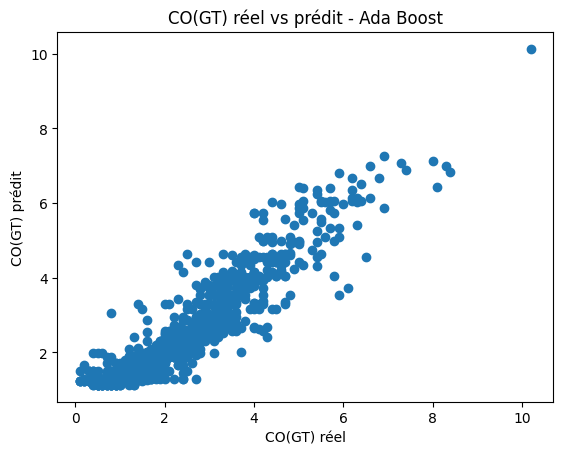

Résultats pour SVR:
Mean Squared Error (Erreur quadratique moyenne): 0.15535705652638582
R-squared (R²): 0.9177177626422264



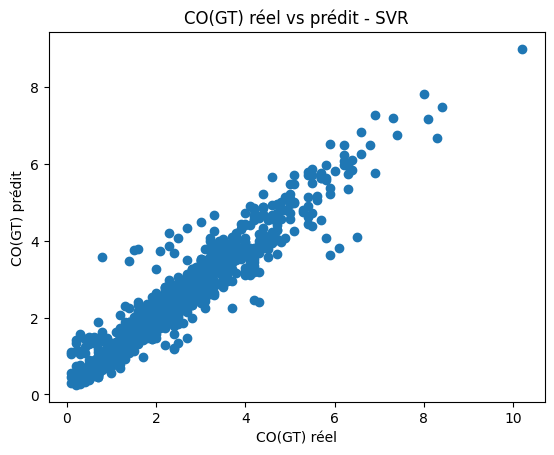

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Résultats pour Arbre de décision:
Mean Squared Error (Erreur quadratique moyenne): 0.32232173172326656
R-squared (R²): 0.8292877463810724



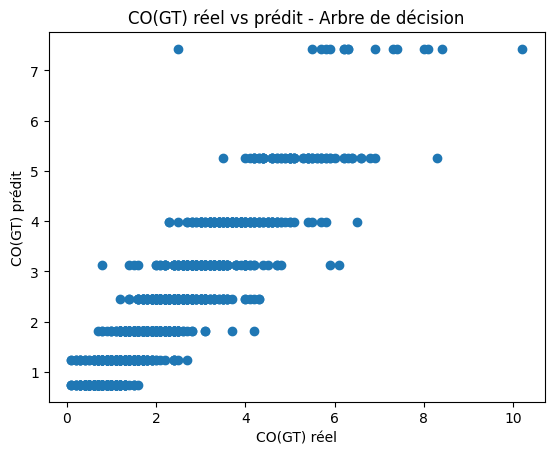

Résultats pour MLP:
Mean Squared Error (Erreur quadratique moyenne): 0.31028100044037643
R-squared (R²): 0.835664916054158



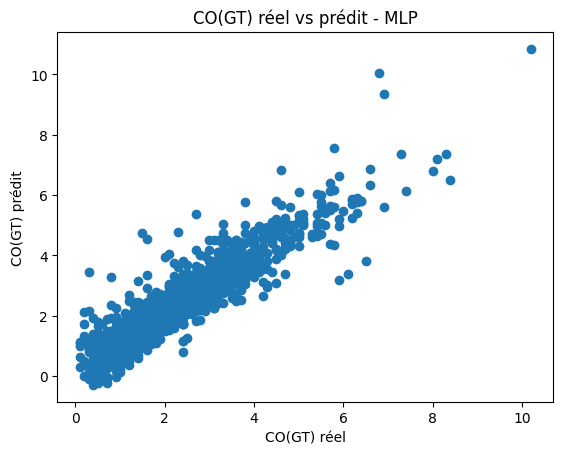

In [25]:


# Sélectionner les caractéristiques (variables indépendantes) et la variable cible
features = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
cible = 'CO(GT)'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(qa[features], qa[cible], test_size=0.2, random_state=42)

# Initialiser différents modèles de régression
lr = LinearRegression()
hr = HuberRegressor(epsilon=1.15, max_iter=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
sv = SVR()
dt = DecisionTreeRegressor(max_features='auto', max_depth=3, random_state=42)
nn = MLPRegressor(hidden_layer_sizes=(500,), solver='adam', learning_rate_init=1e-2, max_iter=500)

# Liste des modèles
modeles = [(lr, 'Régression linéaire'),
           (hr, 'Régression de Huber'),
           (rf, 'Forêt aléatoire'),
           (gb, 'Gradient Boosting'),
           (kn, 'K-Neighbors'),
           (ab, 'Ada Boost'),
           (sv, 'SVR'),
           (dt, 'Arbre de décision'),
           (nn, 'MLP')]

# Boucle pour ajuster et évaluer chaque modèle
for modele, nom_modele in modeles:
    # Entraîner le modèle
    modele.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    predictions = modele.predict(X_test)

    # Évaluer le modèle
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Afficher les résultats
    print(f'Résultats pour {nom_modele}:')
    print(f'Mean Squared Error (Erreur quadratique moyenne): {mse}')
    print(f'R-squared (R²): {r2}\n')

    # Tracer le graphique des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_test, predictions)
    plt.xlabel(f'{cible} réel')
    plt.ylabel(f'{cible} prédit')
    plt.title(f'{cible} réel vs prédit - {nom_modele}')
    plt.show()


**Analyse:** selon les résultas R-squared (R²) les meilleurs modèles pour l'analyse de CO sont:
1. Foret aleatoir  0.920
2. Ada Boost 0.917
3. Régression linéaire 0.916

**Etude du polluant NOX**

Résultats pour Régression linéaire:
Mean Squared Error (Erreur quadratique moyenne): 5497.582808782859
R-squared (R²): 0.8546970426575724



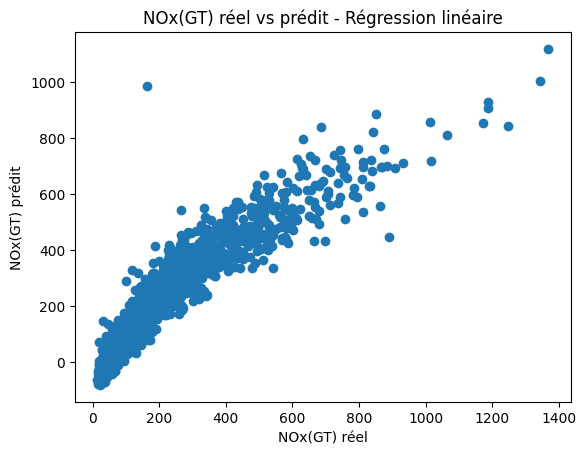

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Résultats pour Régression de Huber:
Mean Squared Error (Erreur quadratique moyenne): 5573.232440354054
R-squared (R²): 0.8526975975247771



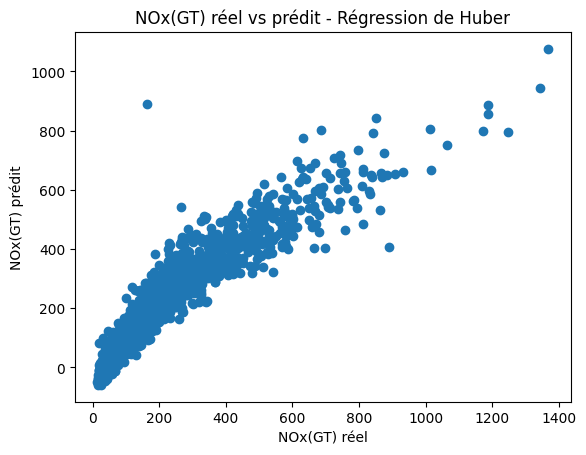

Résultats pour Forêt aléatoire:
Mean Squared Error (Erreur quadratique moyenne): 8819.437027918044
R-squared (R²): 0.7668993216064864



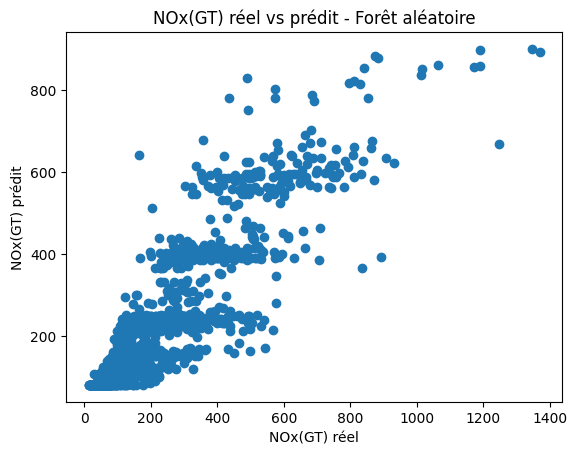

Résultats pour Gradient Boosting:
Mean Squared Error (Erreur quadratique moyenne): 3694.619241783308
R-squared (R²): 0.9023499743873424



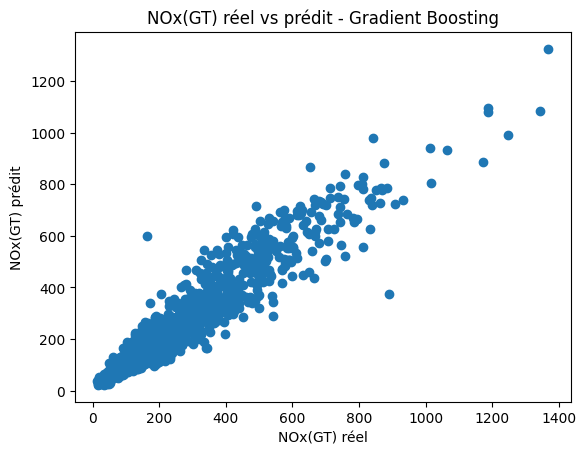

Résultats pour K-Neighbors:
Mean Squared Error (Erreur quadratique moyenne): 4234.016011519078
R-squared (R²): 0.8880935368675023



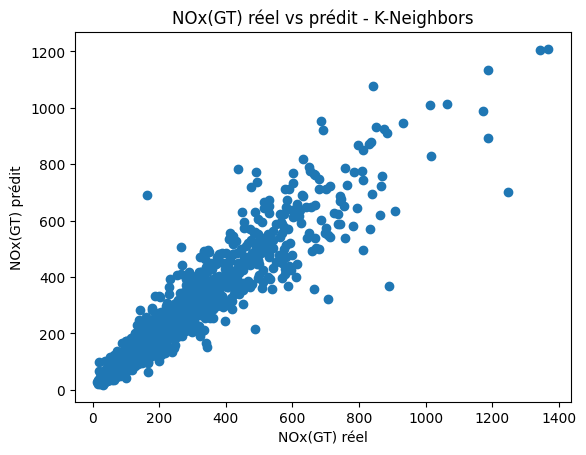

Résultats pour Ada Boost:
Mean Squared Error (Erreur quadratique moyenne): 10882.907245378301
R-squared (R²): 0.7123611117397799



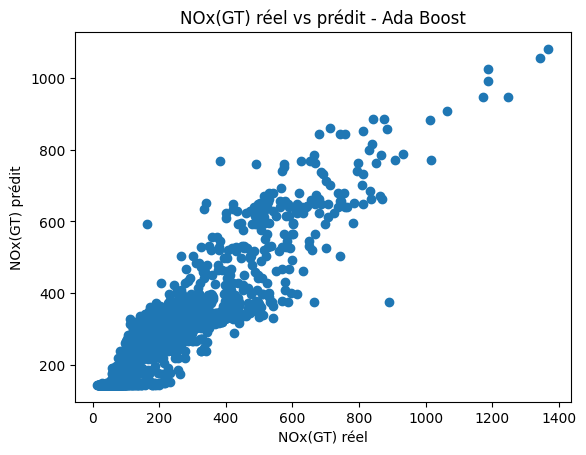

Résultats pour SVR:
Mean Squared Error (Erreur quadratique moyenne): 13933.434479969195
R-squared (R²): 0.6317346538842397



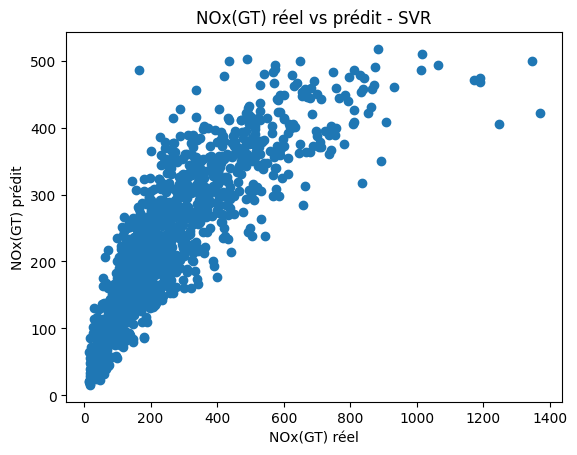

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Résultats pour Arbre de décision:
Mean Squared Error (Erreur quadratique moyenne): 11330.027113551976
R-squared (R²): 0.7005435836748275



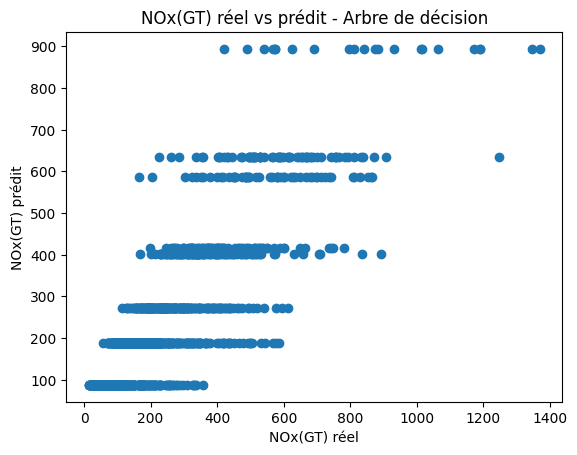

Résultats pour MLP:
Mean Squared Error (Erreur quadratique moyenne): 3241.0068613404906
R-squared (R²): 0.9143391017289408



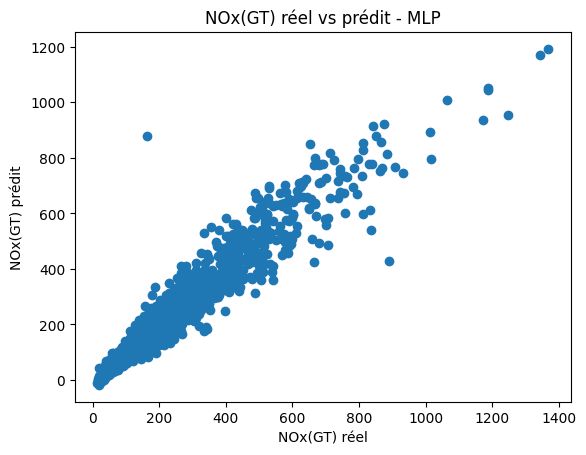

In [26]:


# Sélectionner les caractéristiques (variables indépendantes) et la variable cible
features = ['PT08.S1(CO)','CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
cible =  'NOx(GT)'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(qa[features], qa[cible], test_size=0.2, random_state=42)

# Initialiser différents modèles de régression
lr = LinearRegression()
hr = HuberRegressor(epsilon=1.15, max_iter=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
sv = SVR()
dt = DecisionTreeRegressor(max_features='auto', max_depth=3, random_state=42)
nn = MLPRegressor(hidden_layer_sizes=(500,), solver='adam', learning_rate_init=1e-2, max_iter=500)

# Liste des modèles
modeles = [(lr, 'Régression linéaire'),
           (hr, 'Régression de Huber'),
           (rf, 'Forêt aléatoire'),
           (gb, 'Gradient Boosting'),
           (kn, 'K-Neighbors'),
           (ab, 'Ada Boost'),
           (sv, 'SVR'),
           (dt, 'Arbre de décision'),
           (nn, 'MLP')]

# Boucle pour ajuster et évaluer chaque modèle
for modele, nom_modele in modeles:
    # Entraîner le modèle
    modele.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    predictions = modele.predict(X_test)

    # Évaluer le modèle
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Afficher les résultats
    print(f'Résultats pour {nom_modele}:')
    print(f'Mean Squared Error (Erreur quadratique moyenne): {mse}')
    print(f'R-squared (R²): {r2}\n')

    # Tracer le graphique des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_test, predictions)
    plt.xlabel(f'{cible} réel')
    plt.ylabel(f'{cible} prédit')
    plt.title(f'{cible} réel vs prédit - {nom_modele}')
    plt.show()


**Analyse:** *selon R-squared (R²) lesmeilleurs models pour l'analyse de NOX sont:*

1. MLP  0.914
2. Gradien boosting 0.902
3. K-Neighbors 0.888

**Etude du polluant PT08.S5(O3)**

Résultats pour Régression linéaire:
Mean Squared Error (Erreur quadratique moyenne): 19121.970443402377
R-squared (R²): 0.8757175442571997



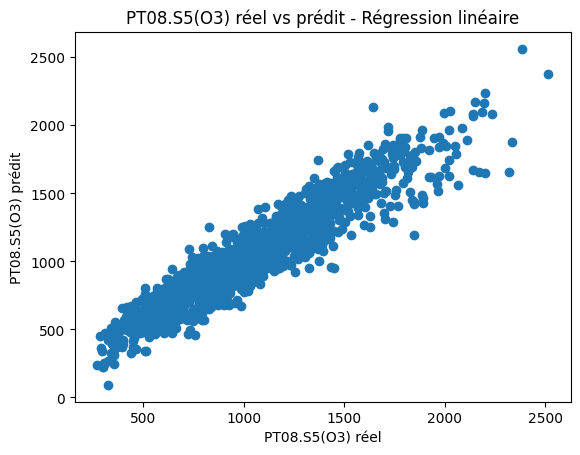

Résultats pour Régression de Huber:
Mean Squared Error (Erreur quadratique moyenne): 19719.7117084608
R-squared (R²): 0.8718325496359524



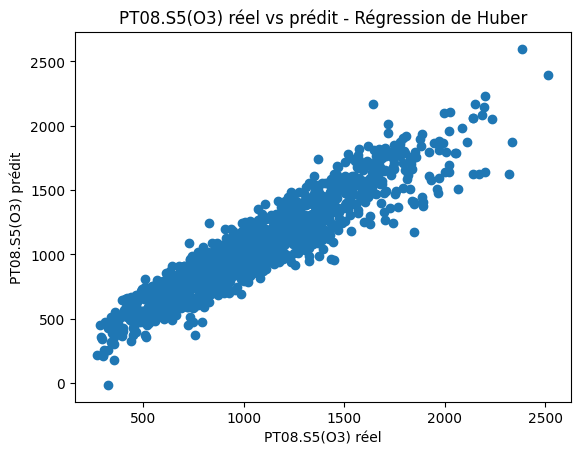

Résultats pour Forêt aléatoire:
Mean Squared Error (Erreur quadratique moyenne): 25985.72740291615
R-squared (R²): 0.8311068398805265



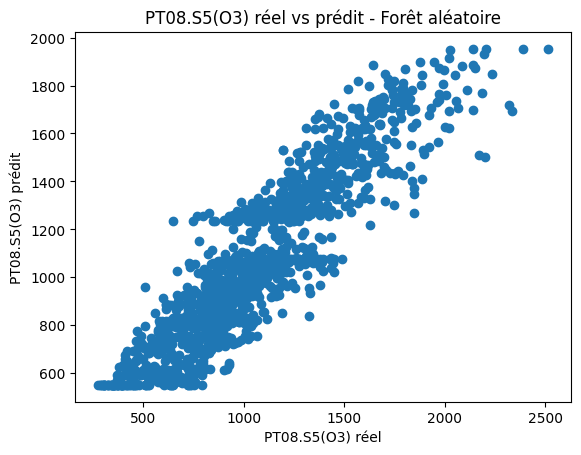

Résultats pour Gradient Boosting:
Mean Squared Error (Erreur quadratique moyenne): 14187.987977875411
R-squared (R²): 0.9077857591528661



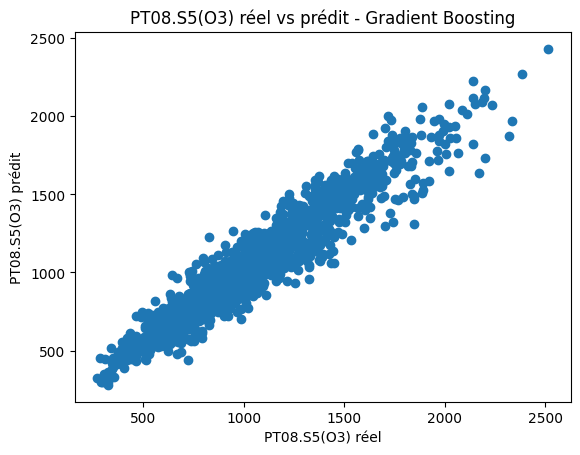

Résultats pour K-Neighbors:
Mean Squared Error (Erreur quadratique moyenne): 14608.428884089271
R-squared (R²): 0.9050531208782883



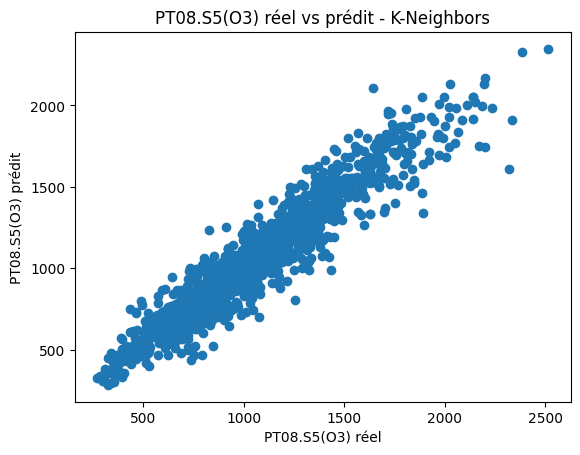

Résultats pour Ada Boost:
Mean Squared Error (Erreur quadratique moyenne): 25585.68162519082
R-squared (R²): 0.8337069208613229



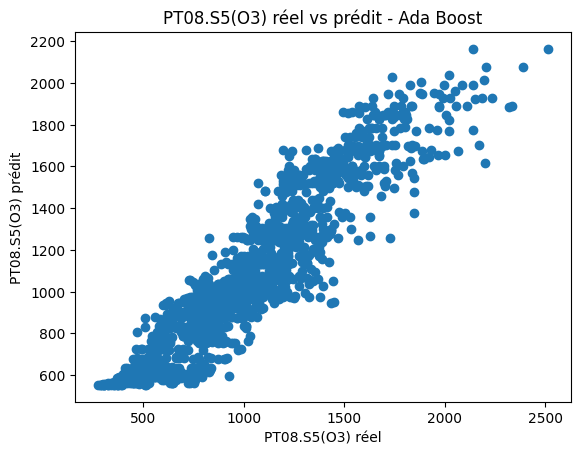

Résultats pour SVR:
Mean Squared Error (Erreur quadratique moyenne): 40609.45875039007
R-squared (R²): 0.7360605030311717



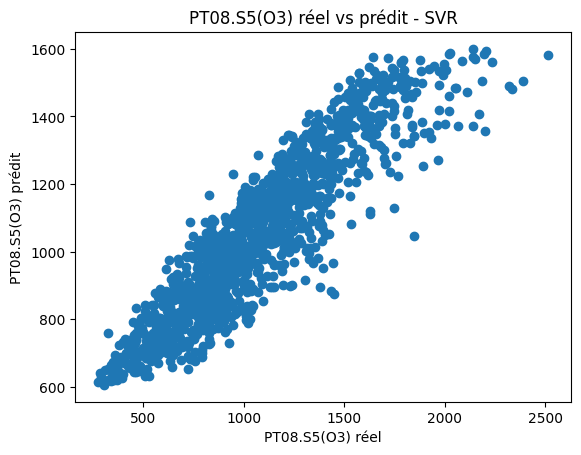

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Résultats pour Arbre de décision:
Mean Squared Error (Erreur quadratique moyenne): 36558.63501423683
R-squared (R²): 0.7623886643051607



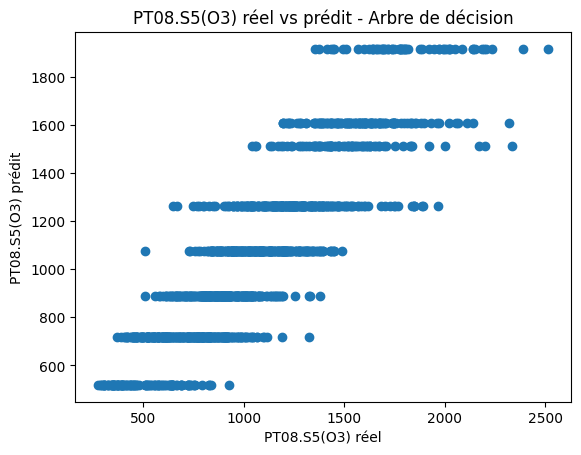

Résultats pour MLP:
Mean Squared Error (Erreur quadratique moyenne): 13324.353354243874
R-squared (R²): 0.9133989166570641



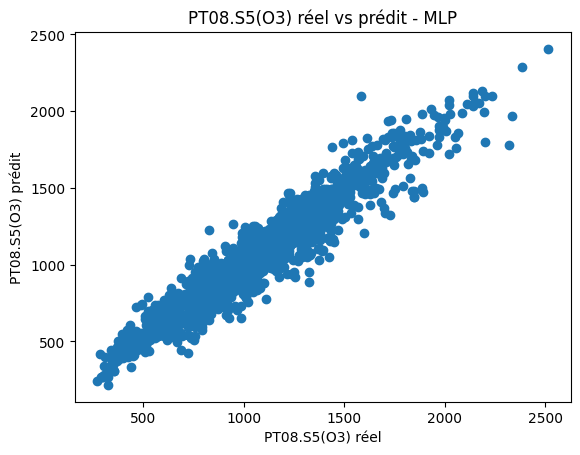

In [27]:


# Sélectionner les caractéristiques (variables indépendantes) et la variable cible
features = ['PT08.S1(CO)','CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','NOx(GT)' , 'T', 'RH', 'AH']
cible =  'PT08.S5(O3)'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(qa[features], qa[cible], test_size=0.2, random_state=42)

# Initialiser différents modèles de régression
lr = LinearRegression()
hr = HuberRegressor(epsilon=1.15, max_iter=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
sv = SVR()
dt = DecisionTreeRegressor(max_features='auto', max_depth=3, random_state=42)
nn = MLPRegressor(hidden_layer_sizes=(500,), solver='adam', learning_rate_init=1e-2, max_iter=500)

# Liste des modèles
modeles = [(lr, 'Régression linéaire'),
           (hr, 'Régression de Huber'),
           (rf, 'Forêt aléatoire'),
           (gb, 'Gradient Boosting'),
           (kn, 'K-Neighbors'),
           (ab, 'Ada Boost'),
           (sv, 'SVR'),
           (dt, 'Arbre de décision'),
           (nn, 'MLP')]

# Boucle pour ajuster et évaluer chaque modèle
for modele, nom_modele in modeles:
    # Entraîner le modèle
    modele.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    predictions = modele.predict(X_test)

    # Évaluer le modèle
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Afficher les résultats
    print(f'Résultats pour {nom_modele}:')
    print(f'Mean Squared Error (Erreur quadratique moyenne): {mse}')
    print(f'R-squared (R²): {r2}\n')

    # Tracer le graphique des valeurs réelles par rapport aux valeurs prédites
    plt.scatter(y_test, predictions)
    plt.xlabel(f'{cible} réel')
    plt.ylabel(f'{cible} prédit')
    plt.title(f'{cible} réel vs prédit - {nom_modele}')
    plt.show()


**Analyse:** *selon R-squared (R²) lesmeilleurs models pour l'analyse de NOX sont:*

 1. MLP  0.913
 2. Gradien boosting 0.907
 3. K-Neighbors 0.905

***Etude de l'influence de la température (T), de l'humidité relative (RH), et de la concentration initiale de monoxyde de carbone (CO) et d'oxyde d'azote (NOx)***

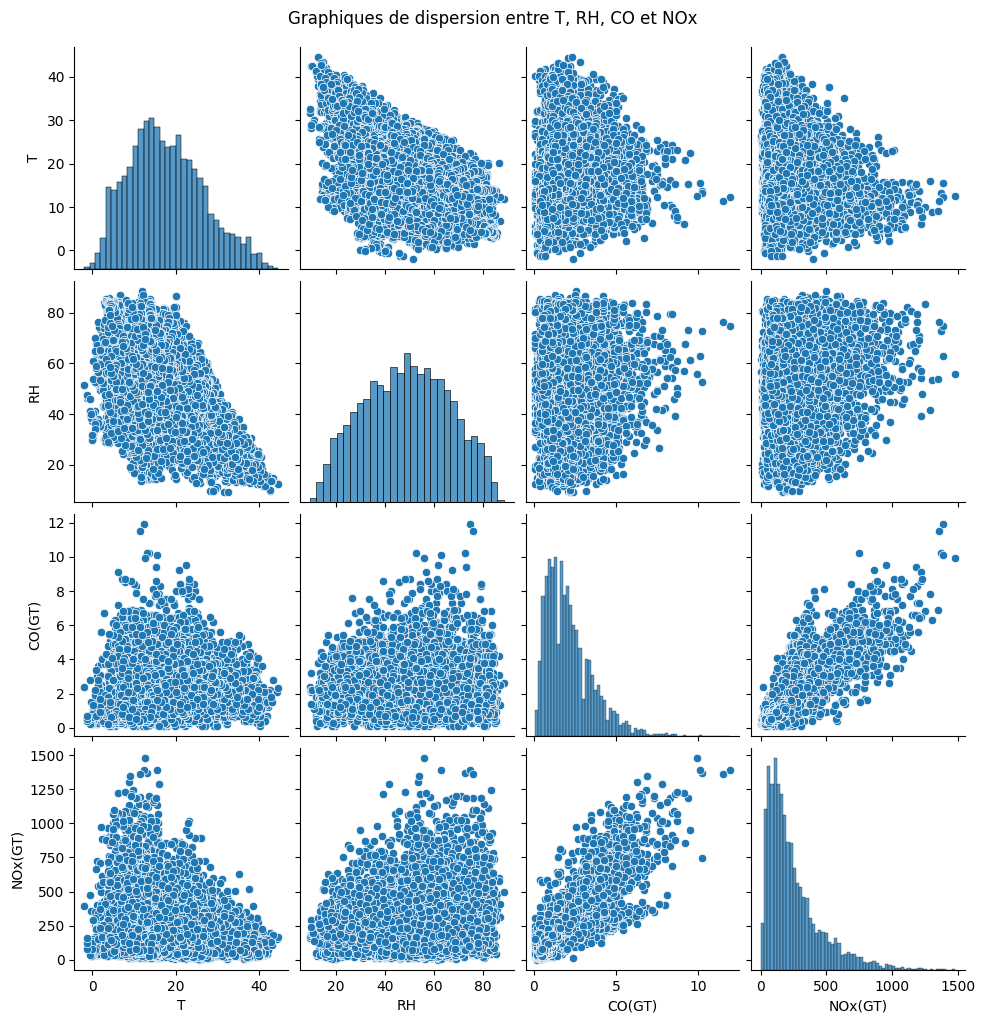

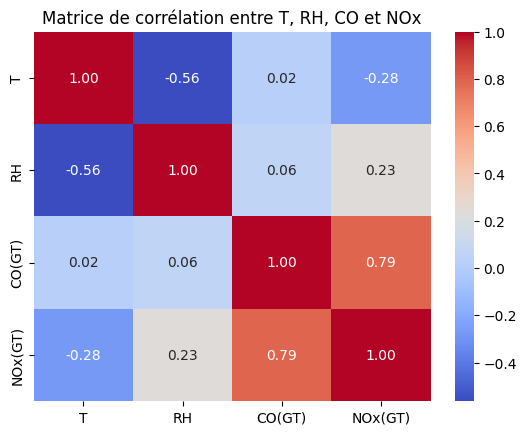

In [28]:
# Sélectionner les variables d'intérêt
variables_interet = ['T', 'RH', 'CO(GT)', 'NOx(GT)']

# Sous-ensemble du DataFrame avec les variables d'intérêt
data_subset = qa[variables_interet]

# Graphiques de dispersion
sns.pairplot(data_subset)
plt.suptitle("Graphiques de dispersion entre T, RH, CO et NOx", y=1.02)
plt.show()

# Matrice de corrélation
correlation_matrix = data_subset.corr()

# Heatmap pour visualiser la corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre T, RH, CO et NOx")
plt.show()

**Analyse**

Les niveaux d'oxyde d'azote (NOx) peuvent augmenter avec la
température (T) due à des réactions chimiques favorisées. L'humidité relative (RH) peut également influencer, parfois inhiber, la formation de NOx en modifiant les conditions de combustion.


Une élévation de la température (T) peut augmenter les émissions de monoxyde de carbone (CO) dans certains processus de combustion. L'humidité relative (RH) peut influencer la combustion, modérant ou exacerbant la production de CO en fonction des conditions.

# **Conclusion:**

Cette analyse démontre que la température et l'humidité relative ont un impact significatif sur les concentrations de NOx et CO. Les modèles, notamment MLP et Gradient Boosting, présentent des performances élevées pour la prédiction des niveaux de NOx. Pour le CO, les modèles RandomForest et AdaBoost montrent une précision remarquable. Ces résultats soulignent l'importance de considérer les conditions environnementales dans la modélisation des polluants atmosphériques. Les R² élevés indiquent une bonne adéquation des modèles aux données, renforçant leur fiabilité pour la prédiction des niveaux de pollution. Ces conclusions fournissent des informations cruciales pour la compréhension et la gestion des émissions atmosphériques, contribuant ainsi à la qualité de l'air et à la protection de l'environnement.

BY M.TAZEKRITT

Apache 2.0 License